# Data Visualization in Python - Introduction to Seaborn

<img src="./figs/seaborn_main.png">

Screenshot from: https://seaborn.pydata.org/index.html

---

### "Seaborn is Python visualization library bases on matplotlib. It provides a high-level interface for drawing attractive statistical graphics."

Being built on top of Matplotlib, we can apply what we have learned from matplotlib directly to seaborn. 

Seaborn integrates well with:

* **Numpy**: package for scientific computation http://www.numpy.org

* **Pandas**: library for data analysis tools http://pandas.pydata.org/



### Introduction to Seaborn: 

https://seaborn.pydata.org/introduction.html

### Seaborn examples:

https://seaborn.pydata.org/examples/index.html

---

# Outline

* **Prettier Plots with Seaborn Styles**

```python
>>> sns.set_style()
>>> sns.reset_orig()
>>> sns.set_context()
```

* **Load data sets**
```python
>>> sns.load_dataset()
```

* **Bar plot**
```python
>>> sns.barplot()
>>> sns.countplot()
```

* **Color palettes**
```python
>>> sns.set_palette()
```
    
* **Linear Regression**
```python
>>> sns.regplot()
>>> sns.lmplot()
```

* **Histograms**
```python
>>> sns.distplot()
>>> sns.joinplot()
```

---

In [1]:
# Show plots in notebook
%matplotlib inline

# Basic plotting library
import matplotlib.pyplot as plt

# For scientific computation
import numpy as np

# Data analysis tools
import pandas as pd

# Later: Import Seaborn
# import seaborn as sns

# Prettier Plots with Seaborn Styles

Source: https://seaborn.pydata.org/tutorial/aesthetics.html

We start by considering damped harmonic oscillators with different damping constants shifted in time.

In [2]:
def plot_oscillator():
    """Plot oscillations with different damping constant shifted in time."""
    # Time
    t = np.arange(0., 1.5 * np.pi, 0.1) 
    
    # Amplitude
    y1 = np.exp(-0.2 * t) * np.cos(np.pi * t)
    y2 = np.exp(-0.3 * t) * np.cos(np.pi * t)
    y3 = np.exp(-0.4 * t) * np.cos(np.pi * t)
    
    # Plot
    plt.plot(t, y1)
    plt.plot(t + 0.25, y2)
    plt.plot(t + 0.50, y3)

## Plot with matplotlib

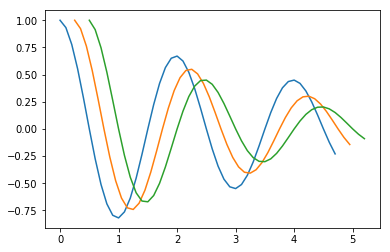

In [3]:
plot_oscillator()

## Plot with seaborn

In [4]:
import seaborn as sns

Seaborn will automatically take care of the figure aesthetics.

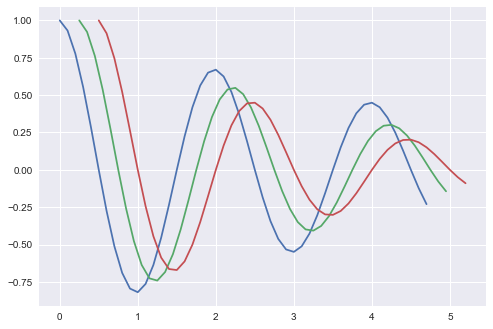

In [5]:
plot_oscillator()

### Seaborn layout styles

Seaborn offers different default styles. The global style can be set with
```python
>>> sns.set_style()
```
Possible style: 

    darkgrid, whitegrid, dark, white, ticks

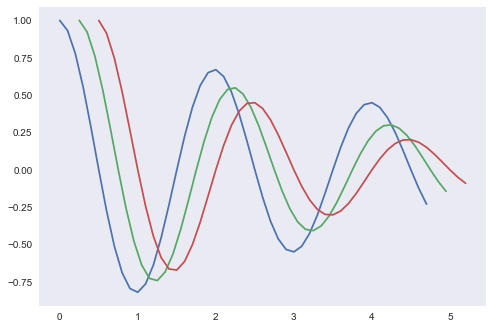

In [6]:
sns.set_style("dark")
plot_oscillator()

To reset the style parameters to the original matplotlib defaults, use
```python
>>> sns.reset_orig()
```
Check the current style parameters with 
```python
>>> sns.axes_style()
```

In [7]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [8]:
sns.set_style({"axes.grid" : True, 
               "grid.color" : 'black', 
               "axes.axisbelow" : False})

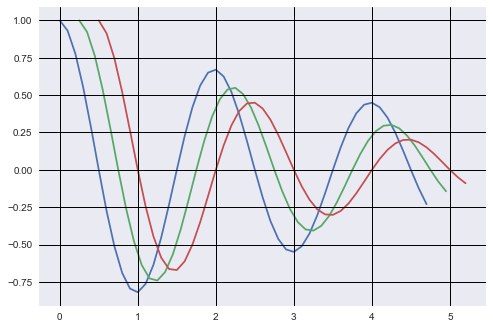

In [9]:
plot_oscillator()

In [10]:
# quick and dirty reset to seaborn defaults: reload module
reload(sns)

<module 'seaborn' from '/usr/local/lib/python2.7/dist-packages/seaborn/__init__.pyc'>

## A note on styles

The dark seaborn styles look pretty on the monitor. However, remember that the figures should also be readable on paper. It thus advisable to use the ``white`` or ``whitegrid`` styles for scientific publications.

Moreover, it is possible to set the "context" of the figure, which affect line width, label sizes, etc. 
```python
>>> sns.set_context(<string>)
```
Possible values are

``notebook, paper, talk, poster``

---

# Load  Titanic data set for plots

Seaborn comes with some data sets which we can loaded from the online repository 
https://github.com/mwaskom/seaborn-data 
using
```python
>>> sns.load_dataset()
```

<img src='http://cdn.history.com/sites/2/2014/01/titanic-P.jpeg'>

In [11]:
titanic = sns.load_dataset('titanic')

``titanic`` is a Pandas dataframe, see http://pandas.pydata.org/. 

Seaborn provides easily accessible plotting functions, which manage the data in the background.

In [12]:
#Explore the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
titanic[titanic['class'] == 'First']['survived'].sum()

136

# Bar plot

Ref: https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial

We can use the Titanic data set to create some simple bar plots.

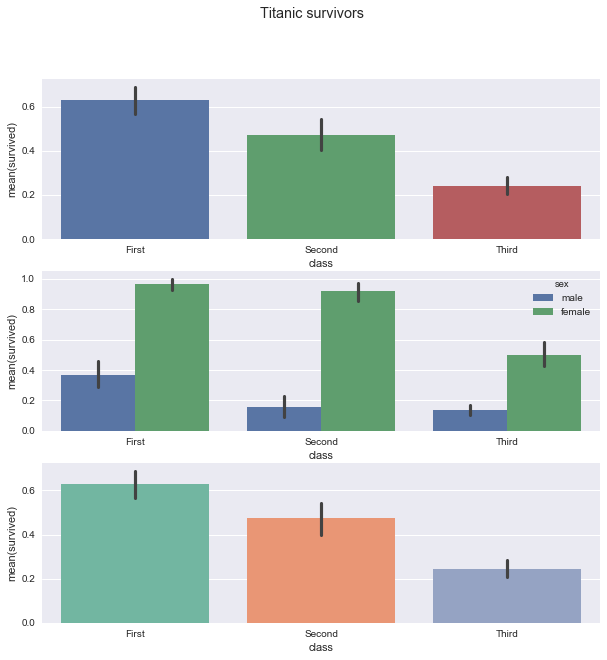

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
fig.suptitle("Titanic survivors")

# Barplot grouped by categorical variable: class
sns.barplot(x='class', y='survived', data=titanic, ax=ax[0]);

# Barplot grouped by categorical variable with nexted distinction between sexes
sns.barplot(x='class', y='survived', hue='sex', data=titanic, ax=ax[1]);

# Control color palette
sns.barplot(x='class', y='survived', data=titanic, ax=ax[2], palette="Set2");

We can control the colors used in the plot by using the keyword ``palette`` when calling ``sns.barplot``.

## Countplot

If we want how many times a certain category appears in the data, use
```python
>>> sns.countplot()
```

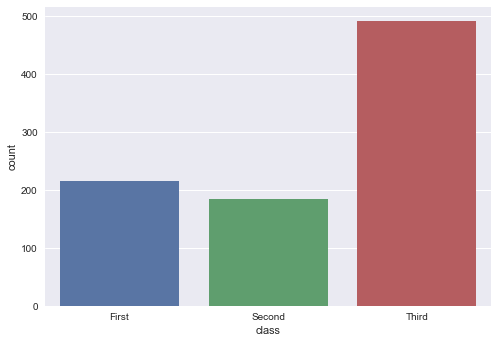

In [15]:
sns.countplot(x="class", data=titanic);

Compare with the number of unique values in the data frame using Pandas:

In [16]:
pd.value_counts(titanic['class'])

Third     491
First     216
Second    184
Name: class, dtype: int64

---

# Colors palettes

Ref: https://seaborn.pydata.org/tutorial/color_palettes.html

On color palettes: http://matplotlib.org/users/colormaps.html

Seaborn offers a variety of different color palettes which are visually pleasing. The color palettes can be chosen using the command
```python
    >>> sns.set_palette(<palette_name>)
```

To get the currently used color palette, use
```python
    >>> sns.color_palette()
```

## Default palettes

The default seaborn style comprises six color palette variations, namely ``"deep", "muted", "pastel", "bright", "dark", "colorblind"``.

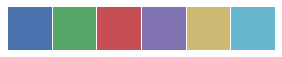

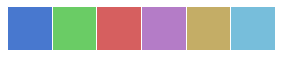

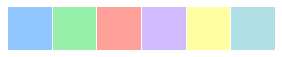

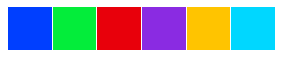

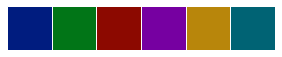

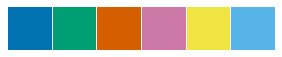

In [17]:
def_pals =  ["deep", "muted", "pastel", "bright", "dark", "colorblind"]
for pal in def_pals:
    # set the palette
    sns.set_palette(pal)
    # get the current palette
    current_palette = sns.color_palette()
    # plot the color palette
    sns.palplot(current_palette, size=0.8)

## Other color palettes

Other seaborn palettes are, for example, 

``"Greys_d", "Greys_r", "Reds_d", "Reds_r", "Greens_d", "Greens_r", "Blues_d", "Blues_r", "Set1", "Set2", "Set3"``

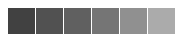

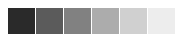

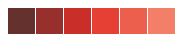

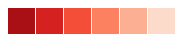

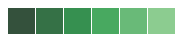

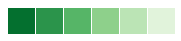

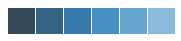

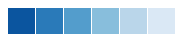

In [18]:
grgb_pals = ["Greys_d", "Greys_r", "Reds_d", "Reds_r", "Greens_d", "Greens_r", 
             "Blues_d", "Blues_r"]
for pal in grgb_pals:
    sns.set_palette(pal)
    current_palette = sns.color_palette()
    sns.palplot(current_palette, size=0.5)

You can also create your own color palettes, for instance
```python
my_colors = ['#e66101','#fdb863','#b2abd2','#5e3c99'] 
my_palette = sns.color_palette(my_colors)
```

For color codes, see http://colorbrewer2.org

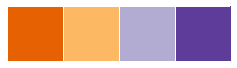

In [19]:
my_colors = ['#e66101','#fdb863','#b2abd2','#5e3c99'] 
my_palette = sns.color_palette(my_colors)
sns.palplot(sns.color_palette(my_palette))

In [20]:
sns.set_palette(my_palette)

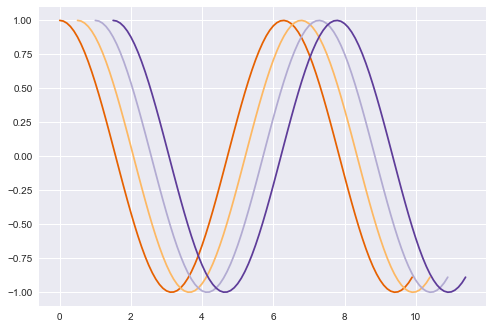

In [21]:
x = np.arange(0, 10, 0.1)
y = np.cos(x)
plt.plot(x, y)
plt.plot(x + 0.5, y)
plt.plot(x + 1.0, y)
plt.plot(x + 1.5, y)

In [22]:
sns.set_palette("deep")

## A Note on Color Palettes

Color is nice, but a word of attention: Remember that articles are often printed in black and white. Always check whether your plot can be understood using only a gray scale. A good approach is therefore to create the plots first in gray scale and to add color subsequently.

---

# Linear Regression

Ref: https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial

Seaborn provides methods to explore data sets for linear dependency between variables. Although it is not intended to be used for quantitative analyses, it can serve as a guide for further research.

## Tips dataset

We load the ``tip`` data set, which contains information about tips in a restaurant, the sum of the bill, the gender of the clinets, the weather, the day time and the party size.

In [23]:
tips = sns.load_dataset("tips")

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seaborn has two methods for linear regression, which share some core functions.
```python
>>> sns.regplot()
>>> sns.lmplot()
```

## ``sns.regplot()``

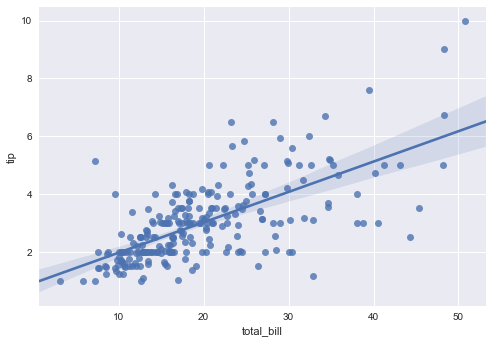

In [25]:
sns.regplot(x='total_bill', y='tip', data=tips)

The parameter ``data`` is not obligatory. ``sns.regplot`` also works for numpy arrays or series:

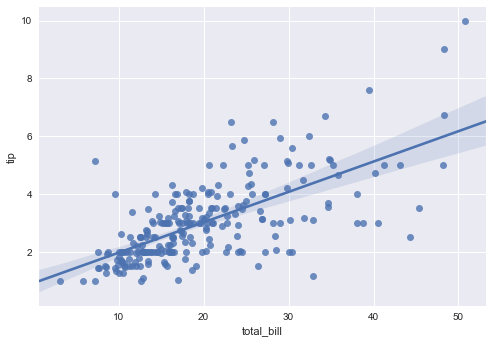

In [26]:
sns.regplot(x=tips['total_bill'], y=tips['tip'])

The shaded area shows the 95% confidence interval for the line parameters.

## ``sns.lmplot()``

The parameter ``data`` and the specification of strings for ``x`` and ``y`` is obligatory.

In [27]:
# Fails:
# sns.lmplot(x=tips['total_bill'], y=tips['tip'])

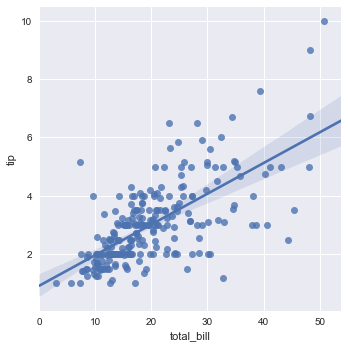

In [28]:
# Works:
sns.lmplot(x='total_bill', y='tip', data=tips)

### Conditioning on other variables

#### Do smokers tip more?

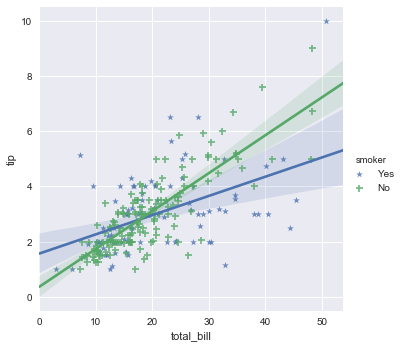

In [29]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers=['*', '+'])

#### Are women or men more generous?

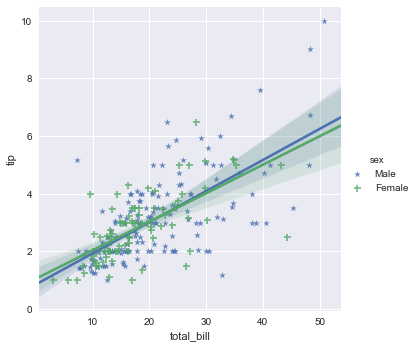

In [30]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips, markers=['*', '+'])

### All together

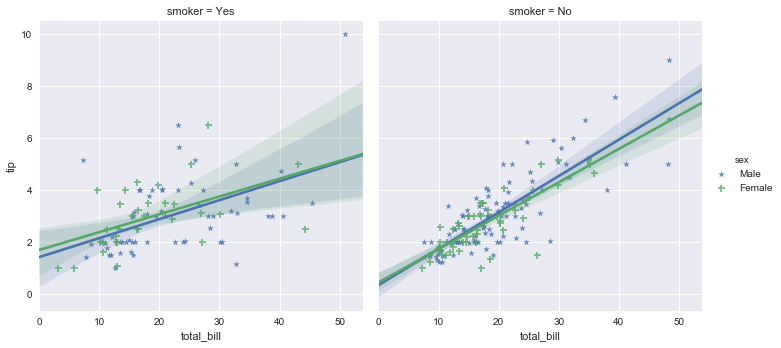

In [31]:
sns.lmplot(x='total_bill', y='tip', 
           hue='sex', col='smoker',
           data=tips, markers=['*', '+'])

**NB:** 

``sns.lmplot`` returns a ``FacetGrid`` and not an ``Axes``. Plot sizes are handled differently from before, see
https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial

---

# Histogram

Source: https://seaborn.pydata.org/tutorial/distributions.html

Let's look at the distribution of tips in the ``tips`` data set.

In [32]:
sns.set_style("darkgrid")

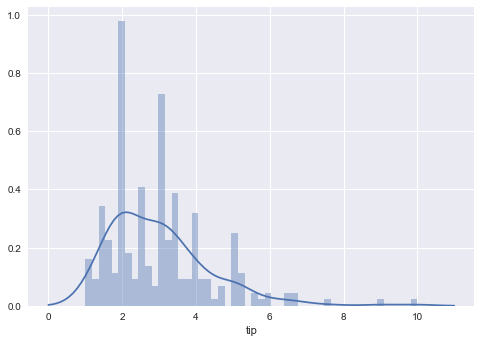

In [33]:
sns.distplot(tips['tip'], bins=50)

## Gaussian distribution

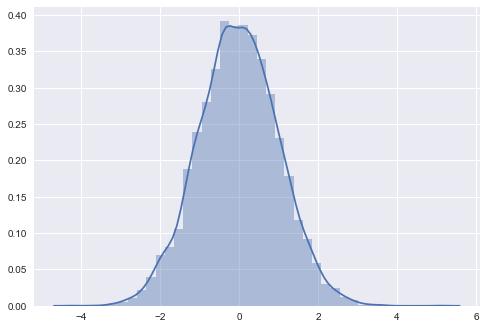

In [34]:
x = np.random.normal(size=10000)
sns.distplot(x, bins=40);

## Hexbin plot

The bivariate histogram is often called a Hexbin plot. We consider a multivariate normal distribution with mean values ``[0, 1]`` and covariance matrix ``[[1, 0.5], [0.5, 1]]``.

In [35]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

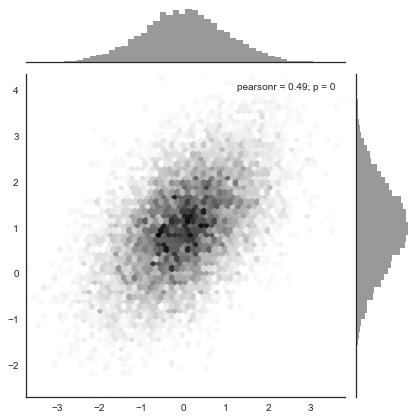

In [36]:
x, y = np.random.multivariate_normal(mean, cov, 10000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

---

# Further Reading

Seaborn has a well-documented API, see

https://seaborn.pydata.org/api.html